In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import analysis_constants as ac

In [2]:
color_map = {
        'input_x_gradients': 'orange',
        'deeplift': 'b',
        'kernel_shap': 'c',
        'integrated_gradients': 'r',
        'lime': 'g',
        'guided_backprop': 'm'
    }

label_map = {
    'input_x_gradients': 'Input X Gradient',
    'deeplift': 'DeepLIFT',
    'kernel_shap': 'Kernel SHAP',
    'integrated_gradients': 'Integrated Gradients',
    'lime': 'LIME',
    'guided_backprop': 'Guided Back Propagation'
}

In [3]:
def load_graph_file():
    IQS_alphas_graph_file = open(f'{ac.IQS_alphas_graph_file}.pkl', 'rb')
    all_scores_dict = pickle.load(IQS_alphas_graph_file)
    IQS_alphas_graph_file.close()
    
    return all_scores_dict

In [4]:
all_scores_dict = load_graph_file()

In [5]:
def process_task_score_dict_for_plot(task_score_dict):   
    xyzs, colors, labels = [], [], []
    
    for frame_name, frame_score_dict in task_score_dict.items():  
        a1s = np.array([k[0]/10.0 for k in frame_score_dict.keys()])
        a2s = np.array([k[1]/10.0 for k in frame_score_dict.keys()])
        scores = a1s = np.array([frame_score_dict[k] for k in frame_score_dict.keys()])        
        color = color_map[frame_name]
        label = label_map[frame_name]
        
        xyzs.append([a1s, a2s, scores])
        colors.append(color)
        labels.append(label)
    
    return xyzs, labels, colors,

In [6]:
def plot_score_for_task(xyzs, labels, colors, ax, task_name):
    tick_label_size, legend_font_size, title_font_size = 8, 5.5, 10
#     ax.set_xticks([a1_idx, a2_idx, a3_idx])
#     ax.set_xticklabels([r'$\alpha_1=1$', r'$\alpha_2=1$', r'$\alpha_3=1$'])
    ax.set_xlabel(r"$\alpha_1$", fontsize=tick_label_size)
    ax.set_ylabel(r"$\alpha_2$", fontsize=tick_label_size)
    ax.set_zlabel(r"$IQS$", fontsize=tick_label_size)
    ax.set_title(f"IQS for {task_name}", fontsize=title_font_size)
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(tick_label_size)
        
    for (x, y, z), label, color in zip(xyzs, labels, colors):
        ax.plot(x, y, z, color, label=label)
        
    ax.legend(prop={"size":legend_font_size})
    ax.view_init(45, -90)

In [7]:
def plot_scores_wrapper(graph_file):
    assert len(graph_file) == len(ac.task_names) #make sure we have all the files
    num_tasks = len(graph_file)
    
    fig = plt.figure(figsize=(2.75, 7.5), dpi=300)
       
    for i, task_name in enumerate(ac.task_names, start=1):
        ax_i = fig.add_subplot(num_tasks, 1, i, projection='3d')
        task_score_dict = graph_file[task_name]
        xyzs, labels, colors = process_task_score_dict_for_plot(task_score_dict)
        plot_score_for_task(xyzs, labels, colors, ax_i, task_name)
    fig.tight_layout()
#     plt.savefig("IQS.svg", format="svg", bbox_inches='tight')

    plt.show()
  


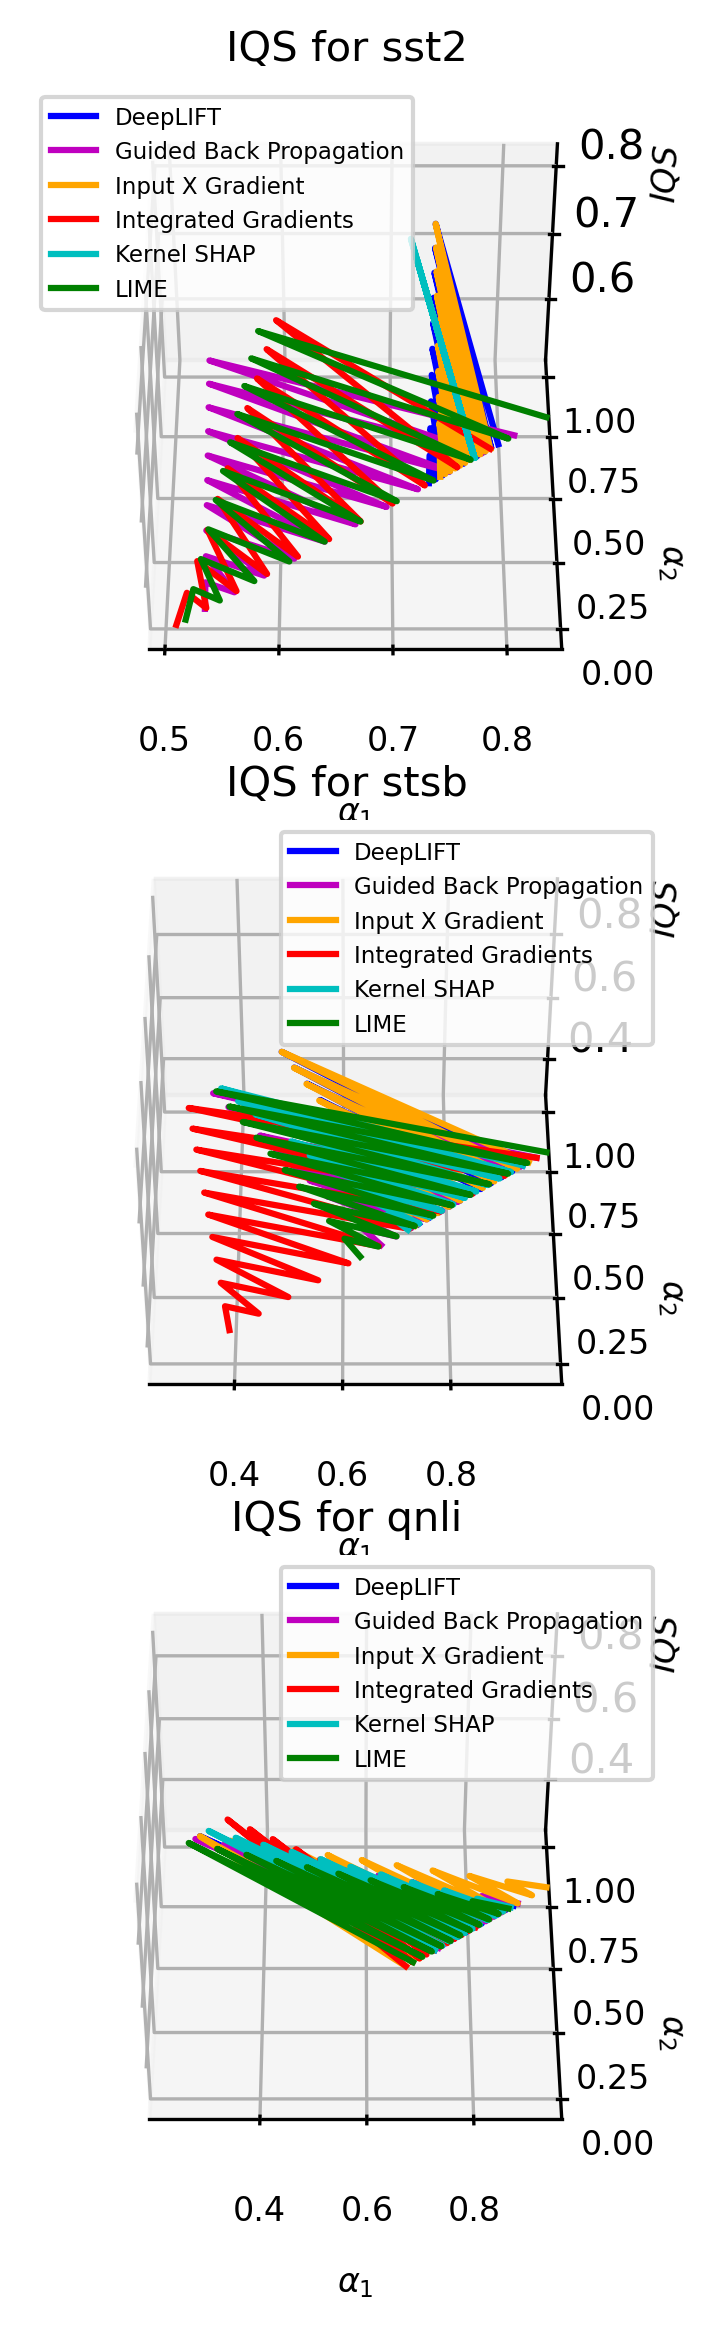

In [8]:
plot_scores_wrapper(all_scores_dict)

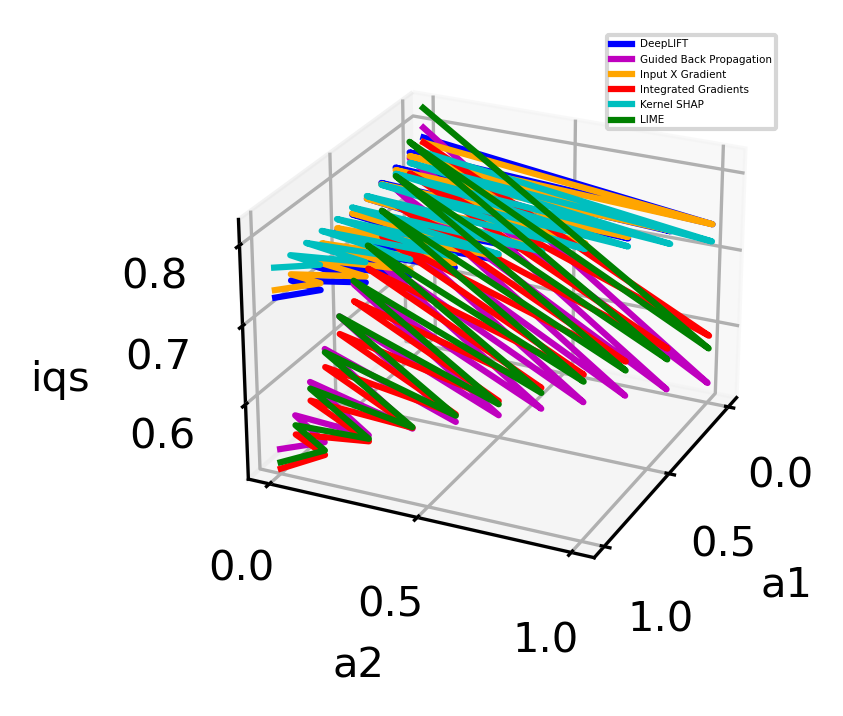

In [9]:
plt.figure(figsize=(2.5, 5), dpi=300)
# sst2_deeplift = all_scores_dict['sst2']['deep_lift']
ax = plt.axes(projection='3d')
ax.set_xlabel('a1')
ax.set_ylabel('a2')
ax.set_zlabel('iqs')
for frame_name, frame_score_dict in all_scores_dict['sst2'].items():  
    

    # Data for a three-dimensional line
    xline = np.array([k[0]/10.0 for k in frame_score_dict.keys()])
    yline = np.array([k[1]/10.0 for k in frame_score_dict.keys()])
    zline = np.array([frame_score_dict[k] for k in frame_score_dict.keys()])
    ax.plot(xline, yline, zline, color_map[frame_name], label=label_map[frame_name])


ax.legend(prop={"size":2.5})
ax.view_init(25, 25)

